# Visualization in the data science workflow
> Often visualization is taught in isolation, with best practices only discussed in a general way. In reality, you will need to bend the rules for different scenarios. From messy exploratory visualizations to polishing the font sizes of your final product; in this chapter, we dive into how to optimize your visualizations at each step of a data science workflow. This is the Summary of lecture "Improving Your Data Visualizations in Python", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Visualization]
- image: 

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)

## First explorations


### Looking at the farmers market data
Loaded is a new dataset, `markets`. Each row of this DataFrame belongs to an individual farmers market in the continental United States with various information about the market contained in the columns. In this exercise, explore the columns of the data to get familiar with them for future analysis and plotting.

As a first step, print out the first three lines of `markets` to get an idea of what type of data the columns encode. Then look at the summary descriptions of all of the columns. Since there are so many columns in the DataFrame, you'll want to turn the results 'sideways' by transposing the output to avoid cutting off rows.

In [67]:
markets = pd.read_csv('./dataset/markets_cleaned.csv', index_col=0)
markets.head()

,name,city,county,state,lat,lon,months_open,Bakedgoods,Beans,Cheese,...,Prepared,Seafood,Soap,Tofu,Trees,Vegetables,WildHarvested,Wine,num_items_sold,state_pop
0,Island Market,Key Largo,Monroe,Florida,-80.427218,25.109214,6,1,1,1,...,1,1,1,0,0,1,0,0,18,19893297.0
1,COFFO Harvest Farmers' Market,Florida City,Miami-Dade,Florida,-80.482299,25.449850,12,0,0,0,...,1,0,0,0,1,1,0,0,7,19893297.0
2,COFFO Harvest Farmers' Market,Homestead,Miami-Dade,Florida,-80.483400,25.463500,12,0,0,0,...,1,0,0,0,1,1,0,0,7,19893297.0
3,Verde Gardens Farmers Market,Homestead,Miami-Dade,Florida,-80.395607,25.506727,12,0,0,0,...,1,0,0,0,0,1,0,0,5,19893297.0
4,Verde Community Farm and Market,Homestead,Miami-Dade,Florida,-80.395607,25.506727,9,0,0,0,...,0,0,0,0,0,1,0,0,5,19893297.0


In [68]:
# Print first three rows of data and transpose
first_rows = markets.head(3).transpose()
print(first_rows)

# Get descriptions of every columns
col_descriptions = markets.describe(include='all',
                                   percentiles=[0.5]).transpose()
print(col_descriptions)

                            0                              1  \
name            Island Market  COFFO Harvest Farmers' Market   
city                Key Largo                   Florida City   
county                 Monroe                     Miami-Dade   
state                 Florida                        Florida   
lat                  -80.4272                       -80.4823   
lon                   25.1092                        25.4499   
months_open                 6                             12   
Bakedgoods                  1                              0   
Beans                       1                              0   
Cheese                      1                              0   
Coffee                      1                              0   
Crafts                      1                              0   
Eggs                        1                              0   
Flowers                     1                              1   
Fruits                      1           

It may seem boring, but these preliminary explorations of your data help set up the foundations of a successful data science project. Now that you've investigated the data, you can see that it is very "wide" – with many columns corresponding to the different goods sold. The goods are encoded with 1s and 0s that indicate whether the market sells the good or not.

### Scatter matrix of numeric columns
You've investigated the new farmer's market data, and it's rather wide – with lots of columns of information for each market's row. Rather than painstakingly going through every combination of numeric columns and making a scatter plot to look at correlations, you decide to make a scatter matrix using the pandas built-in function.

Increasing the figure size with the `figsize` argument will help give the dense visualization some breathing room. Since there will be a lot of overlap for the points, decreasing the point opacity will help show the density of these overlaps.



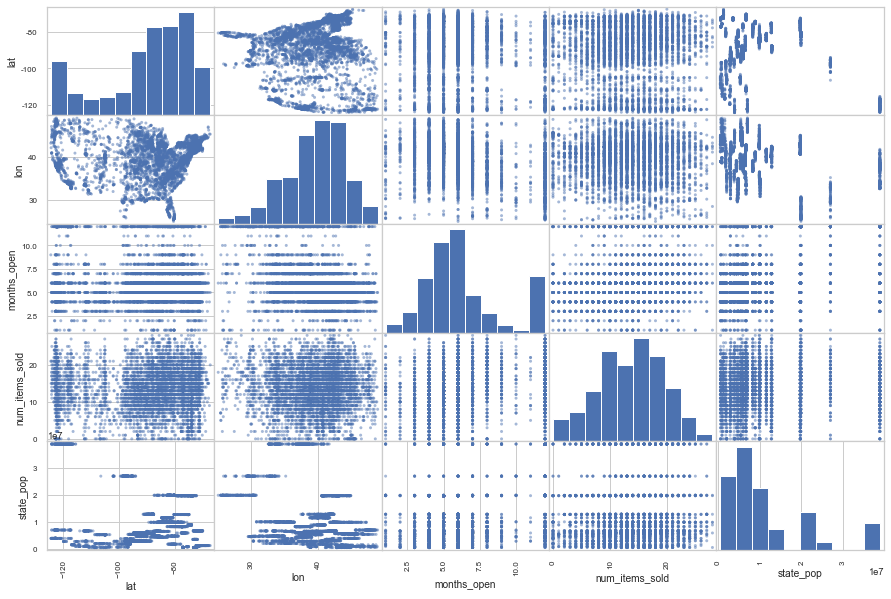

In [69]:
# Select just the numeric columns (excluding individual goods)
numeric_columns = ['lat', 'lon', 'months_open', 'num_items_sold', 'state_pop']

# Make a scatter matrix of numeric columns
pd.plotting.scatter_matrix(markets[numeric_columns],
                          # Make figure larget to show details
                          figsize=(15, 10),
                           # Lower point opacity to show overlap
                           alpha=0.5,
                          );

Scatter matrices can be a lot of information to take in but are super helpful exploration tools. In this plot, we see that, due to many of the variables taking integers values (e.g., days of the week = 1,2,3,...), there is a lot of 'banding' with points clustering in a line along a given axis. Also, you will likely want to log-transform the population values as the distribution is highly skewed.

### Digging in with basic transforms
You are curious to see if the population of a state correlates to the number of items sold at farmer's markets. To check this, take the log of the population and draw a scatter plot against the number of items sold by a market. From your previous explorations of the dataset, you know there will be a lot of overlap, so to get a better handle on the patterns you want to reduce the marker opacity.



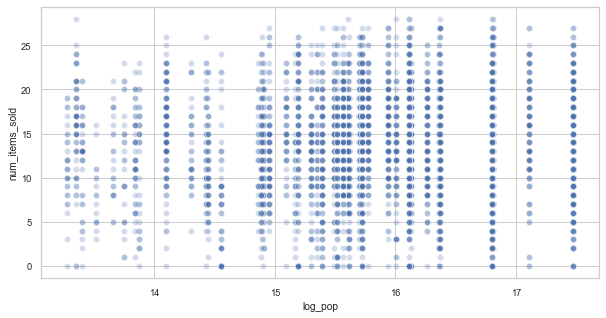

In [70]:
# Create a new logged population column
markets['log_pop'] = np.log(markets['state_pop'])

# Draw a scatterplot of log-population to # of items sold
sns.scatterplot(x='log_pop',
                y='num_items_sold',
                # Reduce point opacity to show overlap
                alpha=0.25,
                data=markets
               );

This plot shows you that even after transforming the population to remove skew and lowering the opacity it's hard to see if there's any relationship between the population and number of items sold.

## Exploring the patterns
- Digging in deeper
    - Investigating correlations
    - Are correlations driven by confounding?
    - ?

### Is latitude related to months open?
While exploring the farmers market dataset with a scatter matrix, you noticed a potentially interesting relationship between a market's latitude and the number of months it stays open. Digging into this relationship a bit further, you decide to use Seaborn's regression plot to see if there's any weight to this pattern or if the heavy overlap of the points is playing tricks on your eyes.

To make the regression line stand out, you'll want to lower the overlapping background points opacity and color them a muted gray. Since you're not going to be making any formal inference and want to quickly investigate a pattern, you can turn off the default uncertainty band.

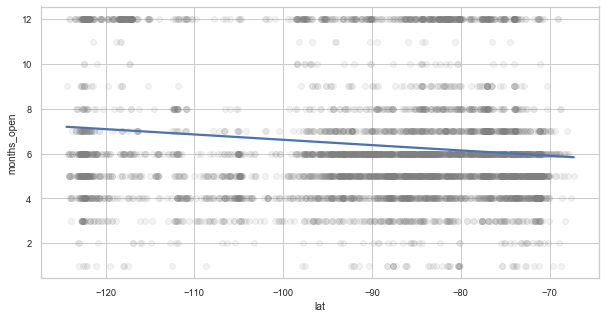

In [71]:
sns.regplot(x='lat',
            y='months_open',
            # Set scatter point opacity & color
           scatter_kws={'alpha':0.1, 'color':'gray'},
           # Disable confidence band
           ci=False,
           data=markets);

Here you see that underneath all the overlapping points there may be a negative relationship between a market's latitude and the number of months it's open. While you would never take these results and call the relationship true, you now have a path to dig into further to see if the signal is true or simply noise.

### What state is the most market-friendly?
While exploring the farmer's market data, you wonder what patterns may show up if you aggregated to the state level. Are some states more market-friendly than other states? To investigate this, you group your data by state and get the log-transformed number of markets (`log_markets`) and state populations (`log_pop`).

In [72]:
markets_and_pop = (markets
    .groupby('state', as_index = False)
    .agg({
       'name': lambda d: np.log(len(d)),
       'state_pop': lambda d: np.log(d.iloc[0]) })
    .rename(columns = {
        'name': 'log_markets', 
        'state_pop': 'log_pop' }))

C:\Users\kcsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


To visualize, you decide to use a regression plot to get an idea of the 'normal' relationship between market and population numbers and a text-scatter to quickly identify interesting outliers.

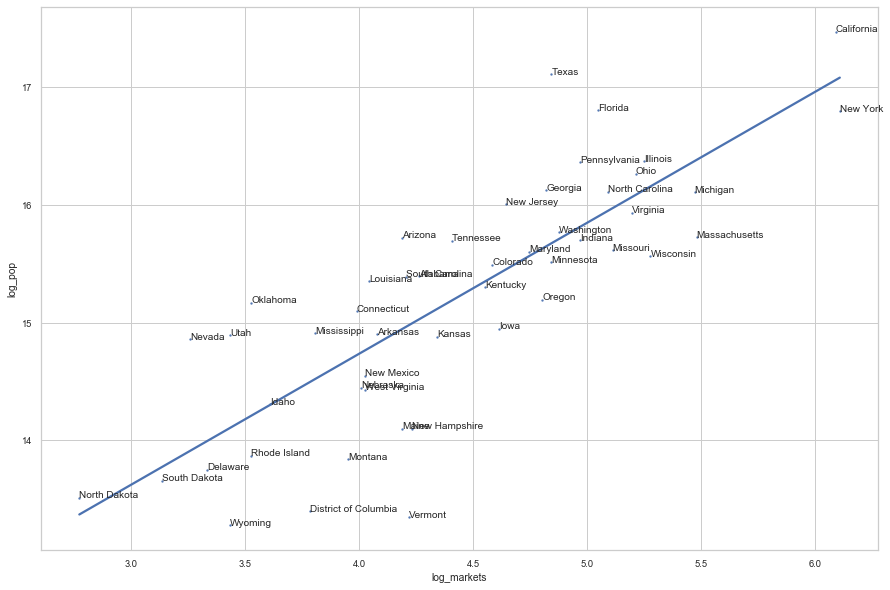

In [73]:
fig, ax = plt.subplots(figsize=(15, 10));
g = sns.regplot(
    "log_markets", "log_pop", 
    ci = False,
    # Shrink scatter plot points
    scatter_kws = {'s':2},
    data = markets_and_pop,
    ax=ax
)

# Iterate over the rows of the data
for _, row in markets_and_pop.iterrows():
    state, log_markets, log_pop = row
    # Place annotation and reduce size for clarity
    g.annotate(state, (log_markets, log_pop), size=10);

The plot you've just made demonstrates how regression plots are not only great for revealing correlations in your data; they also can help you figure out what's out of the ordinary.

Here you see that Vermont and Texas seem to be the largest outliers. With Vermont falling the furthest below the best-fit line and Texas the furthest above. Giving you an idea about what to investigate next.

### Popularity of goods sold by state
The farmer's market dataset contains columns corresponding to 28 different goods and whether or not they are sold at that market. You're curious to see if there are any interesting stories in this dataset regarding how likely you are to find a given good at a state's markets. To answer this question, you collapse the data into three columns:

- `state` - the name of the state
- `good` - the good of interest
- `prop_selling` - the proportion of markets in that state that sell that good

To quickly determine if patterns emerge, you choose a subset of goods you find interesting and decide to make a simple text-scatter: the good on the x-axis and the proportion of a state's markets that sell that good on the y-axis.

In [74]:
goods_by_state = pd.read_csv('./dataset/goods_by_state.csv', index_col=0)

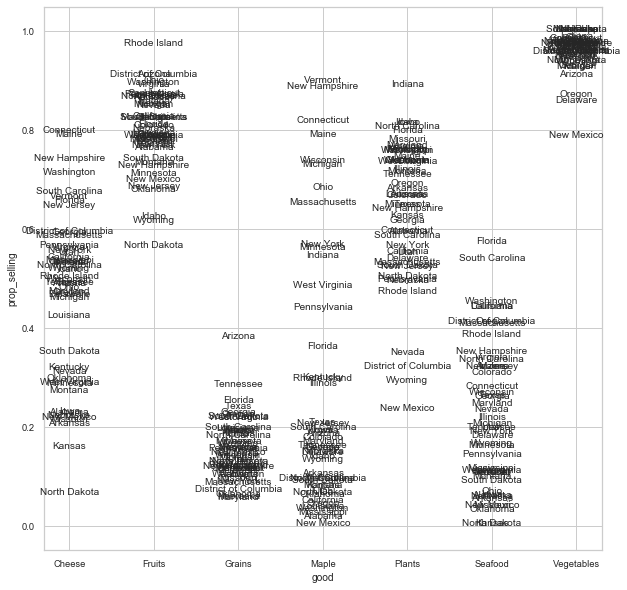

In [75]:
fig, ax = plt.subplots(figsize=(10, 10))
# Subset goods to interting ones
to_plot = ['Cheese', 'Maple', 'Fruits', 'Grains', 'Seafood', 'Plants', 'Vegetables']
goods_by_state_small = goods_by_state.query('good in ' + str(to_plot))

g = sns.scatterplot('good','prop_selling', data = goods_by_state_small,
                    # Hide scatter points by shrinking to nothing
                    s = 0, ax=ax)

for _,row in goods_by_state_small.iterrows():
    g.annotate(row['state'], (row['good'], row['prop_selling']), 
             # Center annotation on axis
             ha = 'center', 
             size = 10)

 You are making some advanced plots now. While this plot may be very messy but also very interesting. You can see specific states rise above the rest, such as Arizona with grains, and other states like New Mexico consistently lag behind others in the availability of goods. This plot provides you with a lot of potential future avenues of exploration. In the coming exercises you'll explore some of these avenues.

## Making your visualizations efficient
- What is efficient?
    - Reduce the effort needed to see story
    - Re-organize plots to keep focus
    - Improve 'ink' to info ratio
    - Don't compromise the message

### Stacking to find trends
In the farmers market dataset, you are interested in the number of months that a market stays open in relation to its geography, more specifically its longitude. You're curious to see if there are any regions of the country that behave noticeably different from the others.

To do this, you create a basic map with a scatter plot of the latitude and longitude of each market, coloring each market by the number of months it's open. Further digging into the latitude relationship, you draw a regression plot of the latitude to the number of months open with a flexible fit line to determine if any trends appear. You want to view these simultaneously to get the clearest picture of the trends.

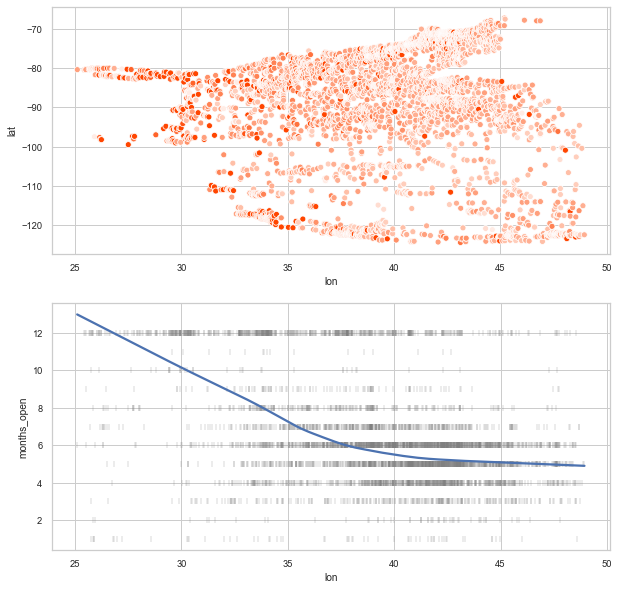

In [76]:
# Setup two stacked plots
_, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Draw location scatter plot on first plot
sns.scatterplot("lon", "lat", "months_open",
               palette=sns.light_palette("orangered", n_colors=12),
               legend=False, data=markets,
               ax=ax1);

# Plot a regression plot on second plot
sns.regplot("lon", "months_open",
           scatter_kws={'alpha':0.2, 'color':'gray', 'marker': '|'},
           lowess=True,
           marker='|', data=markets,
           ax=ax2);

By stacking these two plots, you can tell a detailed story using little space. You have broad geographic trends on how long markets stay open in the top map plot. While below, the scatter focuses on patterns in longitude; showing detailed cross-country trends.

Notice the slight bump around longitude -80? What region of the country seems to be causing this?

### Using a plot as a legend
One interesting thread of investigation in the farmer's market data is a state's "market friendliness" and specifically, the outliers. One way to look at this is by using the ratio of farmer's markets to people by state. You could directly look at the ratio; however, a ratio throws away the raw information about a state's population and the number of markets. A large state with a high ratio could be more interesting than a small one.

You can show both the ratio and raw numbers by drawing two plots, one of the ratio and the other of the market number to population scatter plot. To help simplify your now dense visualization, you can use the bar plot as a legend; calling out interesting states by matching the colors of their bars and scatter points.

In [77]:
markets_by_state = pd.read_csv('./dataset/markets_by_state.csv', index_col=0)

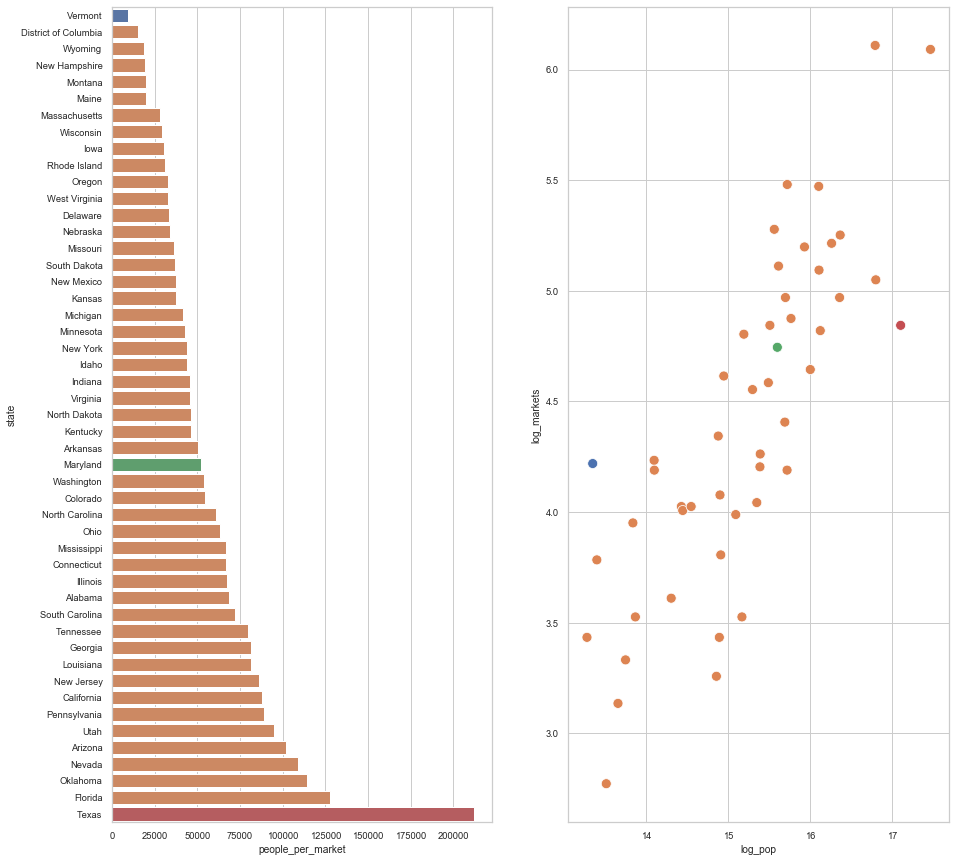

In [78]:
# Set up two side-by-side plots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))

# Map the column for selected states to the bar color
sns.barplot('people_per_market', 'state', hue='is_selected',
           # Disable dodge so bars are full size
           dodge=False,
           data=markets_by_state, ax=ax1);

# Map selected states to point color
sns.scatterplot('log_pop', 'log_markets', hue='is_selected',
               data=markets_by_state, ax=ax2, s=100);

# Remove the legend for both plots
ax1.legend_.remove()
ax2.legend_.remove()

By making double use of the bar chart as a legend, you have made a very efficient and information-dense data visualization. Always be on the lookout for how you can embed your legend into the plot to make the visualization intuitive and clean.

## Tweaking your plots


### Cleaning up the background
While exploring state-level patterns in goods sold at farmer's markets, a few states stood out to you. North Dakota and New Mexico routinely fell near the bottom of the states regarding their proportion of farmer's markets selling a given good. Whereas Vermont was always near the top. You want to present the general patterns in good sales by state, while also highlighting the states you found interesting.

You make a scatter plot of goods being sold by the proportion of markets that sell that good in a state. To highlight the interesting states, you draw a line between each of the state's points. To make a clean and minimal plot, you reduce the background to a simple set of orienting grids.

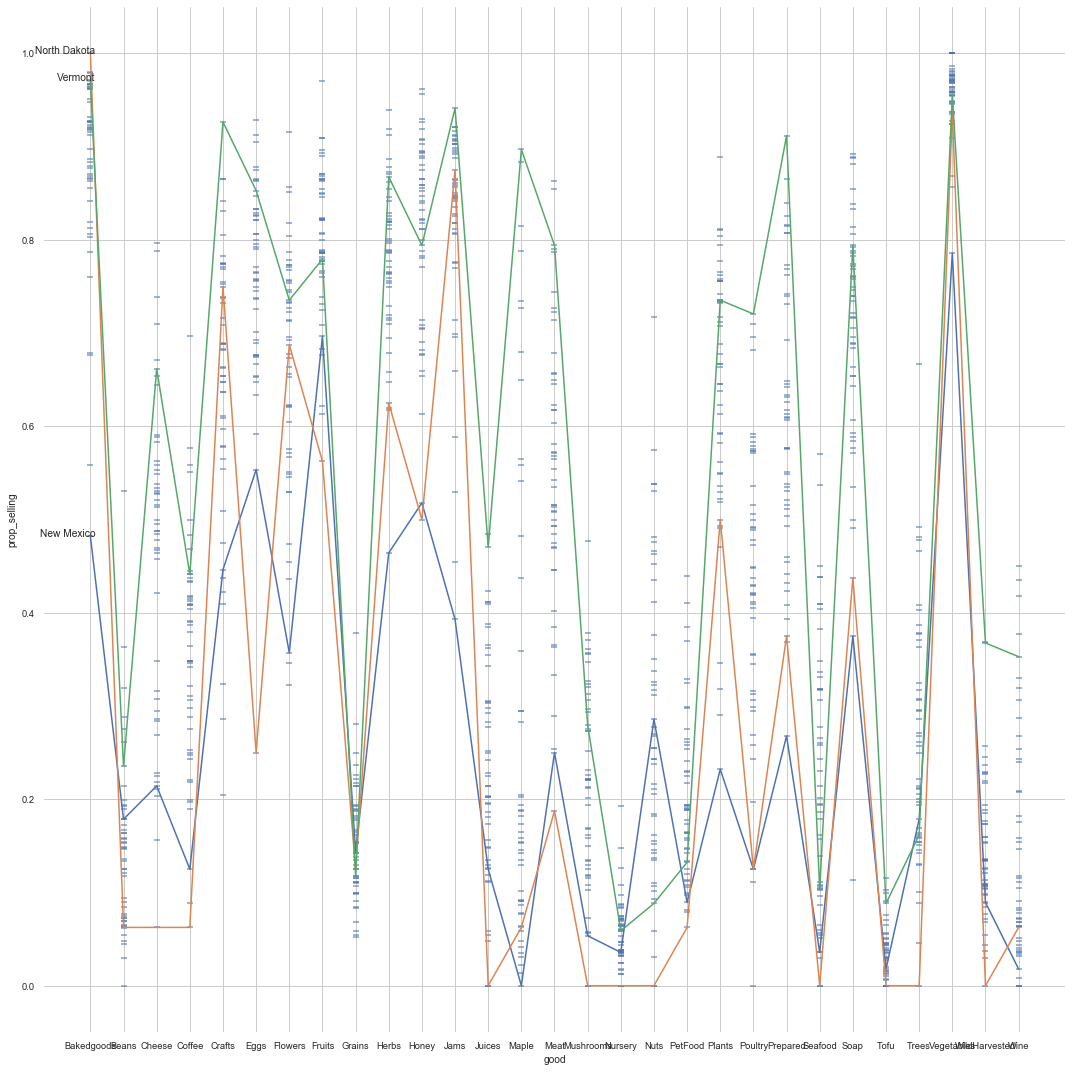

In [79]:
fig, ax = plt.subplots(figsize=(15, 15))

# Set background to white with grid
sns.set_style('whitegrid')

plt.scatter('good', 'prop_selling', marker='_', alpha=0.7, data= goods_by_state);

# Draw lines across goods for highlighted states
highlighted = goods_by_state.query("state in ['New Mexico', 'North Dakota', 'Vermont']")
sns.lineplot('good', 'prop_selling', 'state', data=highlighted, legend=False, ax=ax);

# Draw state name at end of lines
last_rows = highlighted.groupby('state', as_index=False).agg('first')
for _, row in last_rows.iterrows():
    plt.annotate(row['state'], (row['good'], row['prop_selling']),
                ha='right', xytext=(5, 0), textcoords='offset pixels')
    
# Remove all borders
sns.despine(left=True, bottom=True);
plt.tight_layout();

by making these simple tweaks, you've made a plot that is easier to read and much cleaner looking! Pairing these tweaks with text at the end of the highlighted lines and removing the borders creates a polished and interesting plot.

### Remixing a plot
You find the relationship between the latitude of a farmer's market and the number of months the market was open fascinating. Intuitively as one gets further South, the growing seasons are longer, and thus the markets can stay open longer. To visualize this story, you summarize the market data at the state level and draw a heatmap with columns corresponding to the duration the markets are open. Each row in the heatmap shows the distribution of the market "season" for a state and rows are sorted in descending order of the state's latitude.

The default heatmap leaves a lot to be desired. Decrease the font size to allow each state name to fit without overlap. The dark color palette also clashes with the light background, and the colorbar doesn't help the reader as the point is relative comparisons.


In [80]:
markets_by_month = pd.read_csv('./dataset/markets_by_month.csv', index_col=0)
state_by_lat = pd.Index(['North Dakota', 'Washington', 'Montana', 'Minnesota', 'Oregon', 'Idaho', 'Maine', 'South Dakota', 'Vermont', 'Wisconsin', 'Michigan', 'New Hampshire', 'Wyoming', 'Massachusetts', 'New York',
       'Iowa', 'Rhode Island', 'Connecticut', 'Nebraska', 'Illinois', 'Ohio', 'New Jersey', 'Pennsylvania', 'Indiana', 'Utah', 'Colorado', 'Delaware', 'Maryland', 'West Virginia',
       'District of Columbia', 'Kansas', 'Nevada', 'Missouri', 'Virginia', 'Kentucky', 'California', 'Tennessee', 'Oklahoma', 'North Carolina', 'Arkansas', 'New Mexico', 'South Carolina', 'Georgia',
       'Arizona', 'Alabama', 'Mississippi', 'Texas', 'Louisiana', 'Florida'], name='← Latitude')

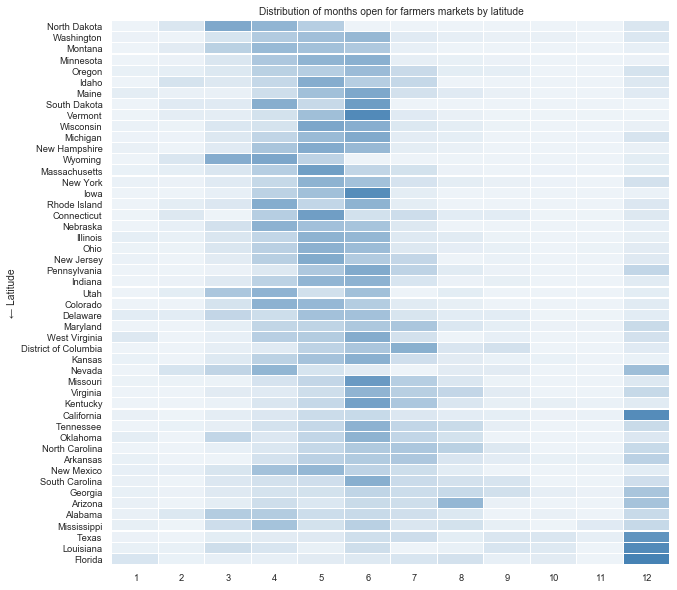

In [81]:
fig, ax = plt.subplots(figsize=(10, 10))
# Decrease font size so state names are less crowded
sns.set(font_scale = 0.85)

# Switch to an appropriate color palette
blue_pal = sns.light_palette("steelblue", as_cmap = True)

# Order states by latitude
g = sns.heatmap(markets_by_month.reindex(state_by_lat), 
            # Add gaps between cells
            linewidths = 0.1, 
            # Set new palette and remove color bar 
            cmap = blue_pal, cbar = False,
            yticklabels = True, ax=ax);

# Rotate y-axis ticks 
g.set_yticklabels(g.get_yticklabels(), rotation = 0);
plt.title('Distribution of months open for farmers markets by latitude');

By making a few minor tweaks to the style of this plot you've made it much more presentable and attractive than it started! The trend of markets staying open for more of the year in southern states is reflected clearly, and the detailed axes allow readers to dig in and find their own stories in the data.

### Enhancing legibility
You and your colleagues have decided that the most important aspect of the data you want to show is the differences between the most "market-friendly" state, Vermont, and the least, Texas. To do this, put two plots side by side – a barplot showing the number of people per farmer's market in the state and a scatter plot showing the population on the x-axis and the number of markets on the y-axis.

Emphasize your findings by calling out Vermont and Texas by assigning them distinct colors. Also, provide a large and easy to read annotation for Texas.

In [84]:
markets_by_state2 = pd.read_csv('./dataset/markets_by_state2.csv', index_col=0)

In [85]:
state_colors = ['steelblue', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray',
 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray',
 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray',
 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray',
 'gray', 'orangered']

tx_message =  'Texas has a large population\nand relatively few farmers\nmarkets.'

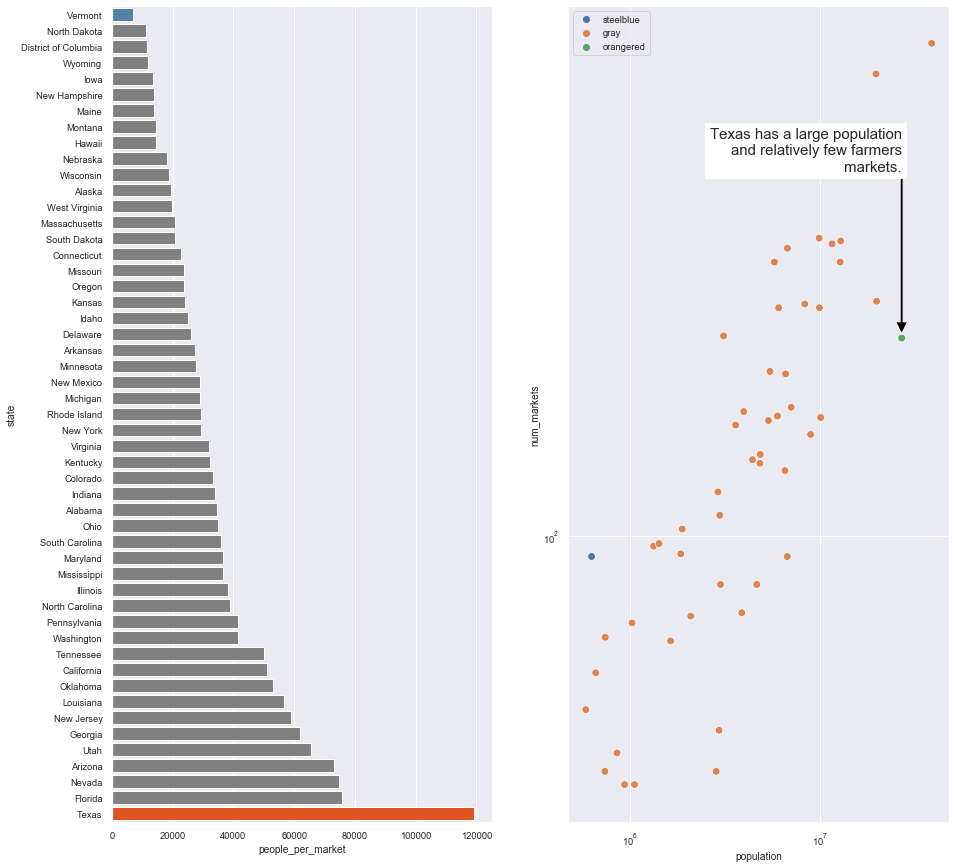

In [86]:
# Set up two side-by-side plots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))

# Draw barplot w/ colors mapped to state_colors vector
sns.barplot('people_per_market', 'state', palette = state_colors,
            data = markets_by_state2, ax = ax1)

# Map state colors vector to the scatterplot as well
p = sns.scatterplot('population', 'num_markets', hue = state_colors,
                    data = markets_by_state2, s = 60, ax = ax2)

# Log the x and y scales of our scatter plot so it's easier to read
ax2.set(xscale = "log", yscale = 'log')

# Increase annotation text size for legibility
ax2.annotate(tx_message, xy = (26956958,230), 
             xytext = (26956958, 450),ha = 'right', 
             size = 15, backgroundcolor = 'white',
             arrowprops = {'facecolor':'black', 'width': 3})
sns.set_style('whitegrid')

In this rather advanced plot, the viewer has their eyes guided by the colors to two important states. The annotation helps guide the exploration of the plot; showing Texas and Vermont fall on both ends of the spectrum for both state size and people-per-market.

By providing two different views of the data with the bar and scatter and linking two important values between the plots using subtle color cues, your visualization instantly becomes more approachable.